In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers

import cv2  
import numpy as np
import os

male_path = './face_images/male/'
female_path = './face_images/female/'


features, labels = [], []

for i in os.listdir(male_path):

    img = cv2.imread(male_path+i,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (150, 150))
    img = img/255.0
    features.append(img)
    labels.append(0)

for i in os.listdir(female_path):

    img = cv2.imread(female_path+i,cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (150, 150))
    img = img/255.0
    features.append(img)
    labels.append(1)
    

features = np.asarray(features, np.float32)
labels = np.asarray(labels, np.float32)
train_images = features.reshape((-1, 150, 150, 1))
train_labels = labels

print(train_images.shape)
print(train_labels.shape)
print(train_labels)

(200, 150, 150, 1)
(200,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


In [2]:

model = Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 1)),
  layers.MaxPooling2D((2, 2)),
 
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(2, activation='softmax')
])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 11,215,362
Trainable params: 11,215,362
Non-trainable params: 0
____________________________________________

In [3]:

model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)


train_history = model.fit(
  x=train_images,
  y=to_categorical(train_labels),
  validation_split=0.2,
  epochs=80,
  batch_size=16,
)

Epoch 1/80
10/10 [==============================] - 3s 237ms/step - loss: 2.7541 - accuracy: 0.5312 - val_loss: 0.0961 - val_accuracy: 1.0000
Epoch 2/80
10/10 [==============================] - 2s 204ms/step - loss: 0.7565 - accuracy: 0.6375 - val_loss: 0.5962 - val_accuracy: 0.7250
Epoch 3/80
10/10 [==============================] - 2s 188ms/step - loss: 0.3558 - accuracy: 0.8813 - val_loss: 0.8618 - val_accuracy: 0.4750
Epoch 4/80
10/10 [==============================] - 2s 199ms/step - loss: 0.2248 - accuracy: 0.9375 - val_loss: 0.8617 - val_accuracy: 0.4750
Epoch 5/80
10/10 [==============================] - 2s 204ms/step - loss: 0.1440 - accuracy: 0.9750 - val_loss: 1.3402 - val_accuracy: 0.3500
Epoch 6/80
10/10 [==============================] - 2s 189ms/step - loss: 0.0847 - accuracy: 1.0000 - val_loss: 0.8140 - val_accuracy: 0.5750
Epoch 7/80
10/10 [==============================] - 2s 205ms/step - loss: 0.0457 - accuracy: 1.0000 - val_loss: 0.9796 - val_accuracy: 0.5500
Epoch 

0


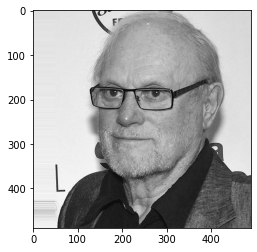

In [4]:
img = cv2.imread('./male1.jpg',cv2.IMREAD_GRAYSCALE)
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img,cv2.IMREAD_GRAYSCALE))
img = cv2.resize(img, (150, 150))
img = img/255.0
img = np.asarray(img).reshape(-1,150, 150,1 )

result = np.argmax(model.predict(img))
print(result)

(150, 150)
0


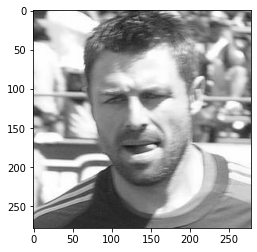

In [5]:
img = cv2.imread('./male2.jpg',cv2.IMREAD_GRAYSCALE)
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE))
img = cv2.resize(img, (150, 150))

img = img/255.0
print(img.shape)

img = np.asarray(img).reshape(-1, 150, 150,1 )
result = np.argmax(model.predict(img))
print(result)

1


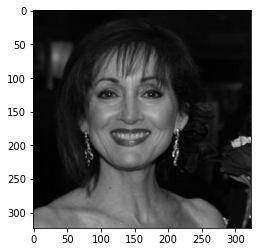

In [6]:
img = cv2.imread('./female1.jpg',cv2.IMREAD_GRAYSCALE)
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
img = cv2.resize(img, (150, 150))
img = img/255.0
img = np.asarray(img).reshape(-1, 150, 150,1 )
result = np.argmax(model.predict(img))
print(result)

1


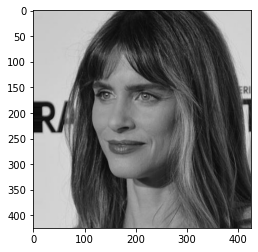

In [7]:
img = cv2.imread('./female2.jpg',cv2.IMREAD_GRAYSCALE)
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
img = cv2.resize(img, (150, 150))
img = img/255.0
img = np.asarray(img).reshape(-1, 150, 150,1 )
result = np.argmax(model.predict(img))
print(result)